In [10]:
# Import libraries
from msc_code.scripts.notebook_setup import *

In [11]:
import_path = os.path.join(PROC_DATA_DIR, 'bias_assessment', 'case_data.csv')
case_data = pd.read_csv(import_path)

In [12]:
case_data.head()

,Study_ID,Patient_ID,Age_Yrs,Gender,Is_Intentional,Is_Prisoner,Is_Psych_Inpat,Is_Displaced_Person,Under_Influence_Alcohol,Psych_Hx,...,Intervention_Treatment_Described,Post_Intervention_Condition_Described,Harms_Described,Takeaway_Lessons_Provided,Overall_Appraisal,Reviewer_Initials,Review_Date,Comments_Reasoning,Outcome_Unknown,Object_Unknown
0,51,51-001,20.0,Male,1.0,1.0,0.0,NaN,0.0,NaN,...,Y,Y,Y,Y,Include,JGE,2025-05-09,No comment.,N,N
1,51,51-002,20.0,Male,1.0,1.0,0.0,NaN,0.0,NaN,...,Y,Y,Y,Y,Include,JGE,2025-05-10,No comment.,N,N
2,51,51-003,19.0,Male,1.0,1.0,0.0,NaN,0.0,NaN,...,Y,Y,Y,Y,Include,JGE,2025-05-11,No comment.,N,N
3,51,51-004,21.0,Male,1.0,1.0,0.0,NaN,0.0,NaN,...,Y,Y,Y,Y,Include,JGE,2025-05-12,No comment.,N,N
4,51,51-005,29.0,Male,1.0,1.0,0.0,NaN,0.0,NaN,...,Y,Y,Y,Y,Include,JGE,2025-05-13,No comment.,N,N


In [13]:
case_data.Study_ID.nunique()

68

In [14]:
case_data.shape

(79, 49)

In [18]:
case_data.Age_Yrs.isna().sum()

np.int64(0)

In [23]:
case_data.Age_Yrs.min()

np.float64(4.0)

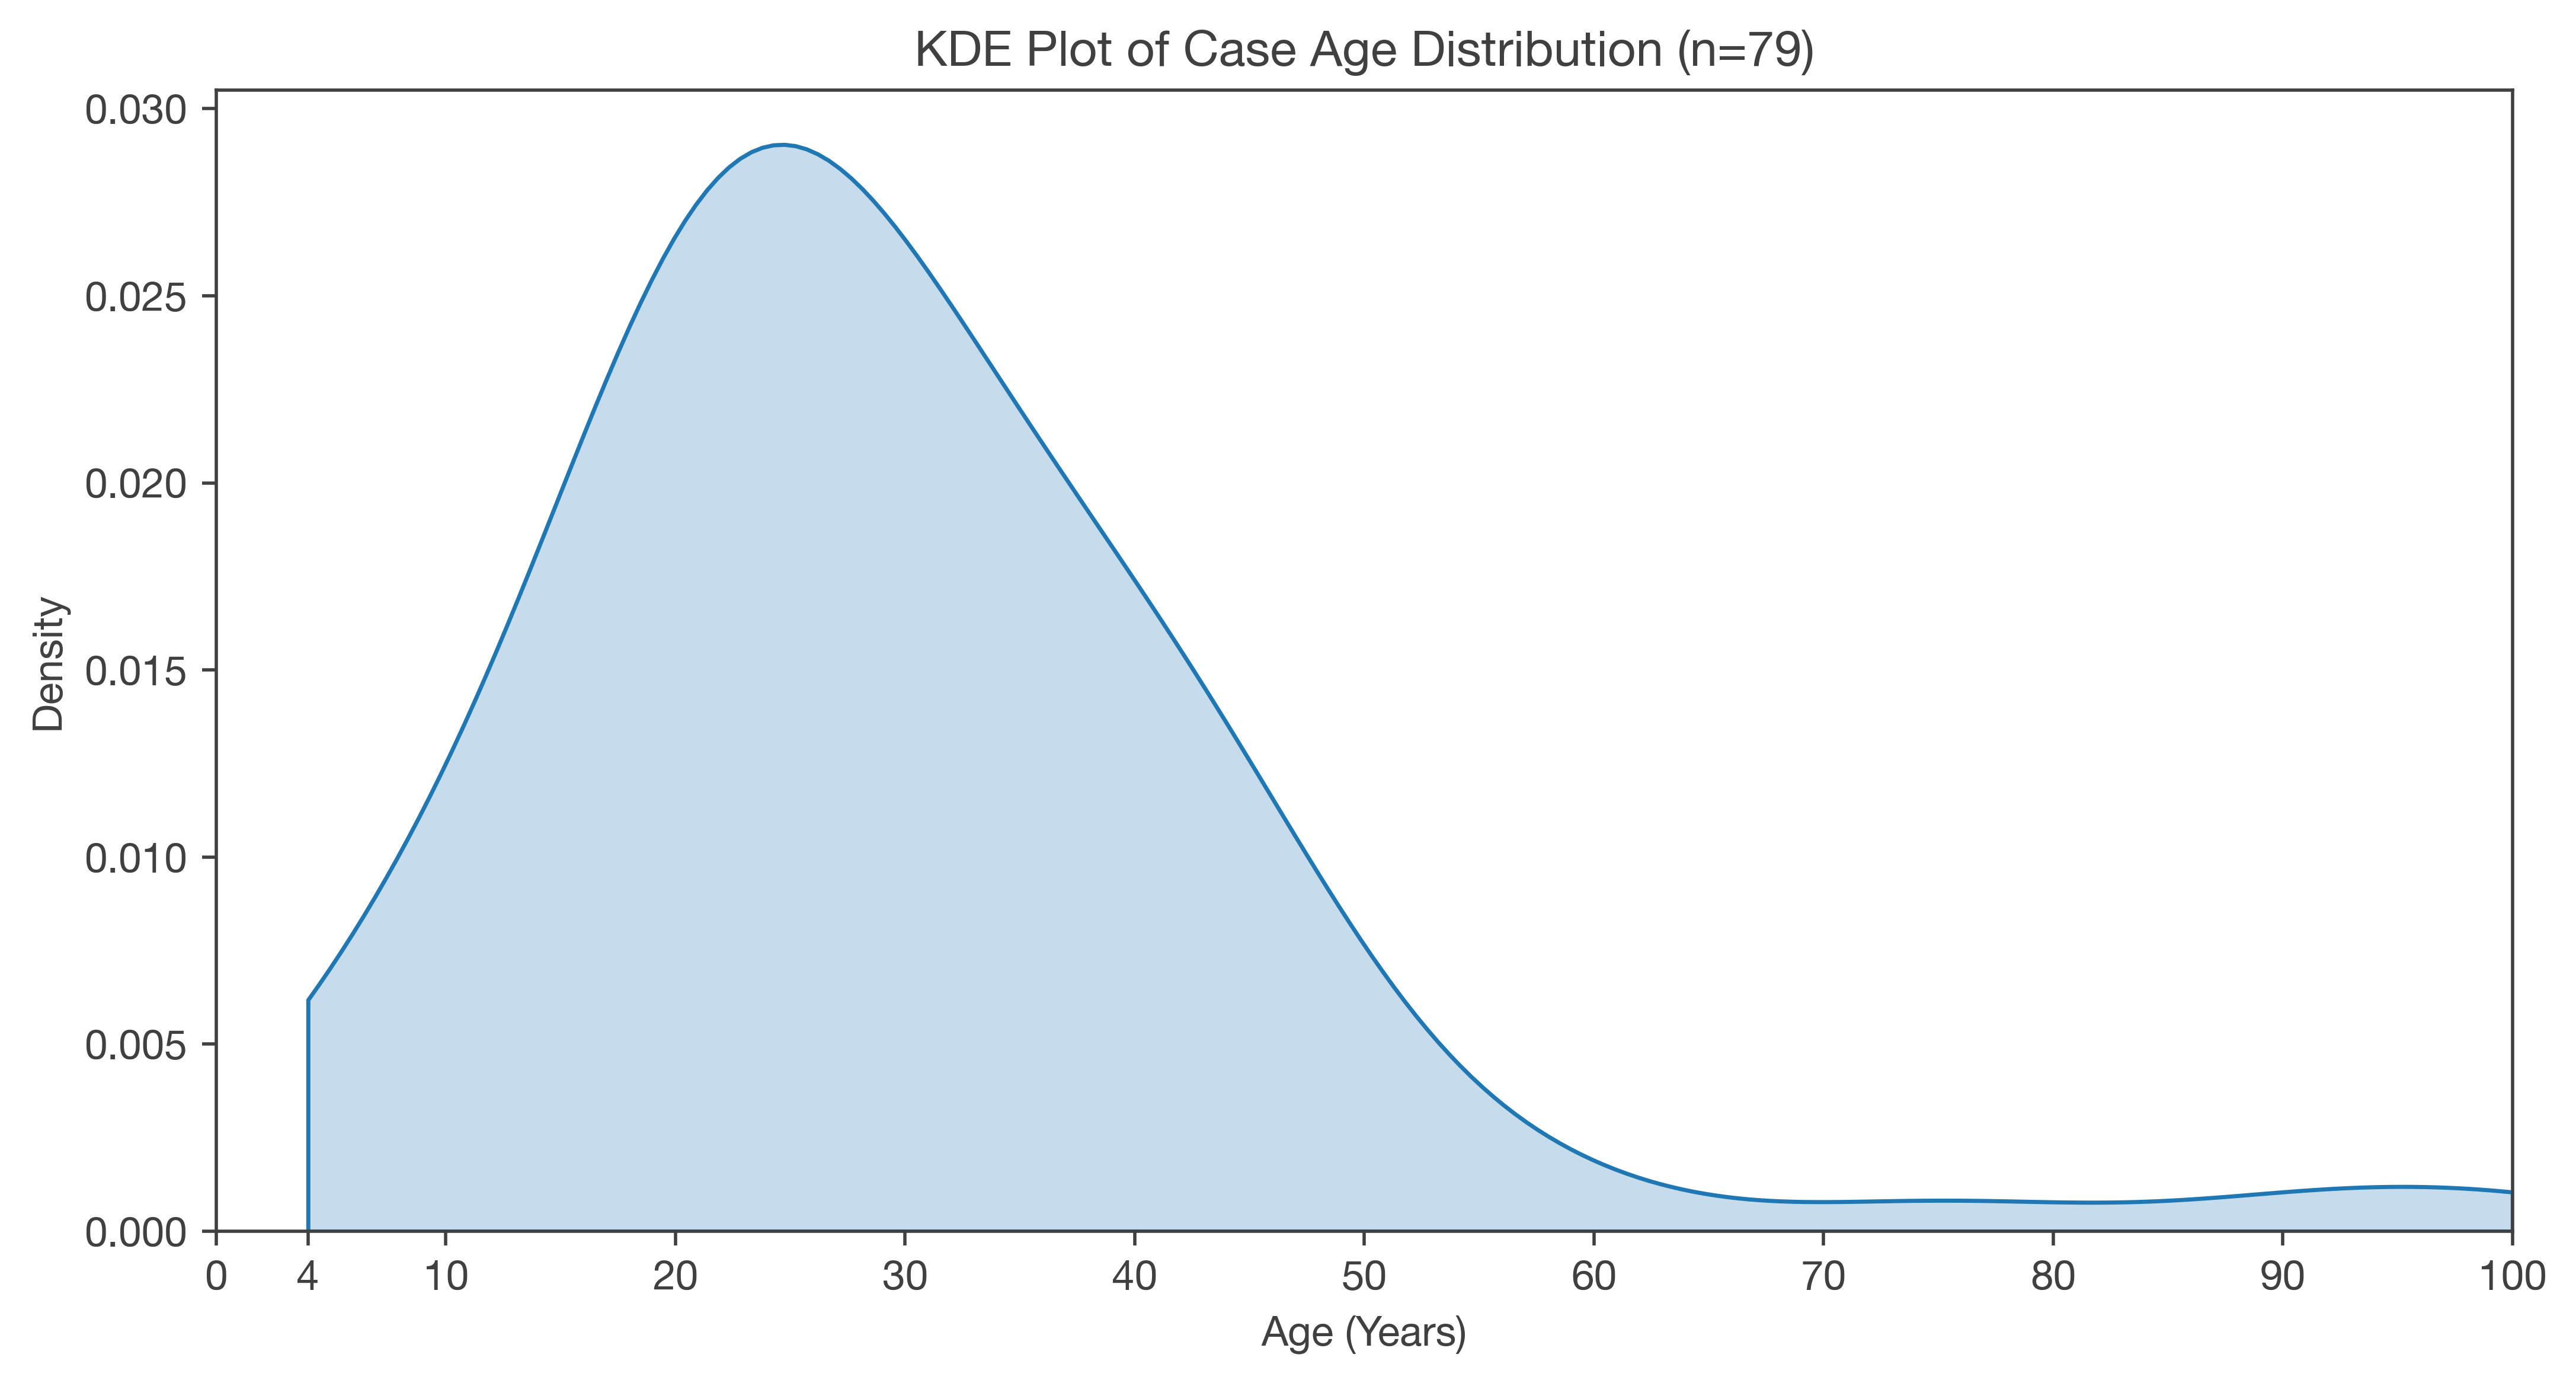

In [33]:
plot_data = case_data.Age_Yrs
plt.figure(figsize=(10,5))
ax=sns.kdeplot(data=plot_data, fill=True, clip=(plot_data.min(),plot_data.max()))

ax.set(title=f'KDE Plot of Case Age Distribution (n={len(case_data)})',
       xlabel='Age (Years)',
       xlim=(0, 100))

# Custom ticks to include 4
ticks = np.arange(0, 101, 10)
if 4 not in ticks:
    ticks = np.sort(np.append(ticks, 4))

ax.set_xticks(ticks)



In [ ]:
case_data.Gender.value_counts()

Gender
Male       50
Female     28
Unknown     1
Name: count, dtype: int64

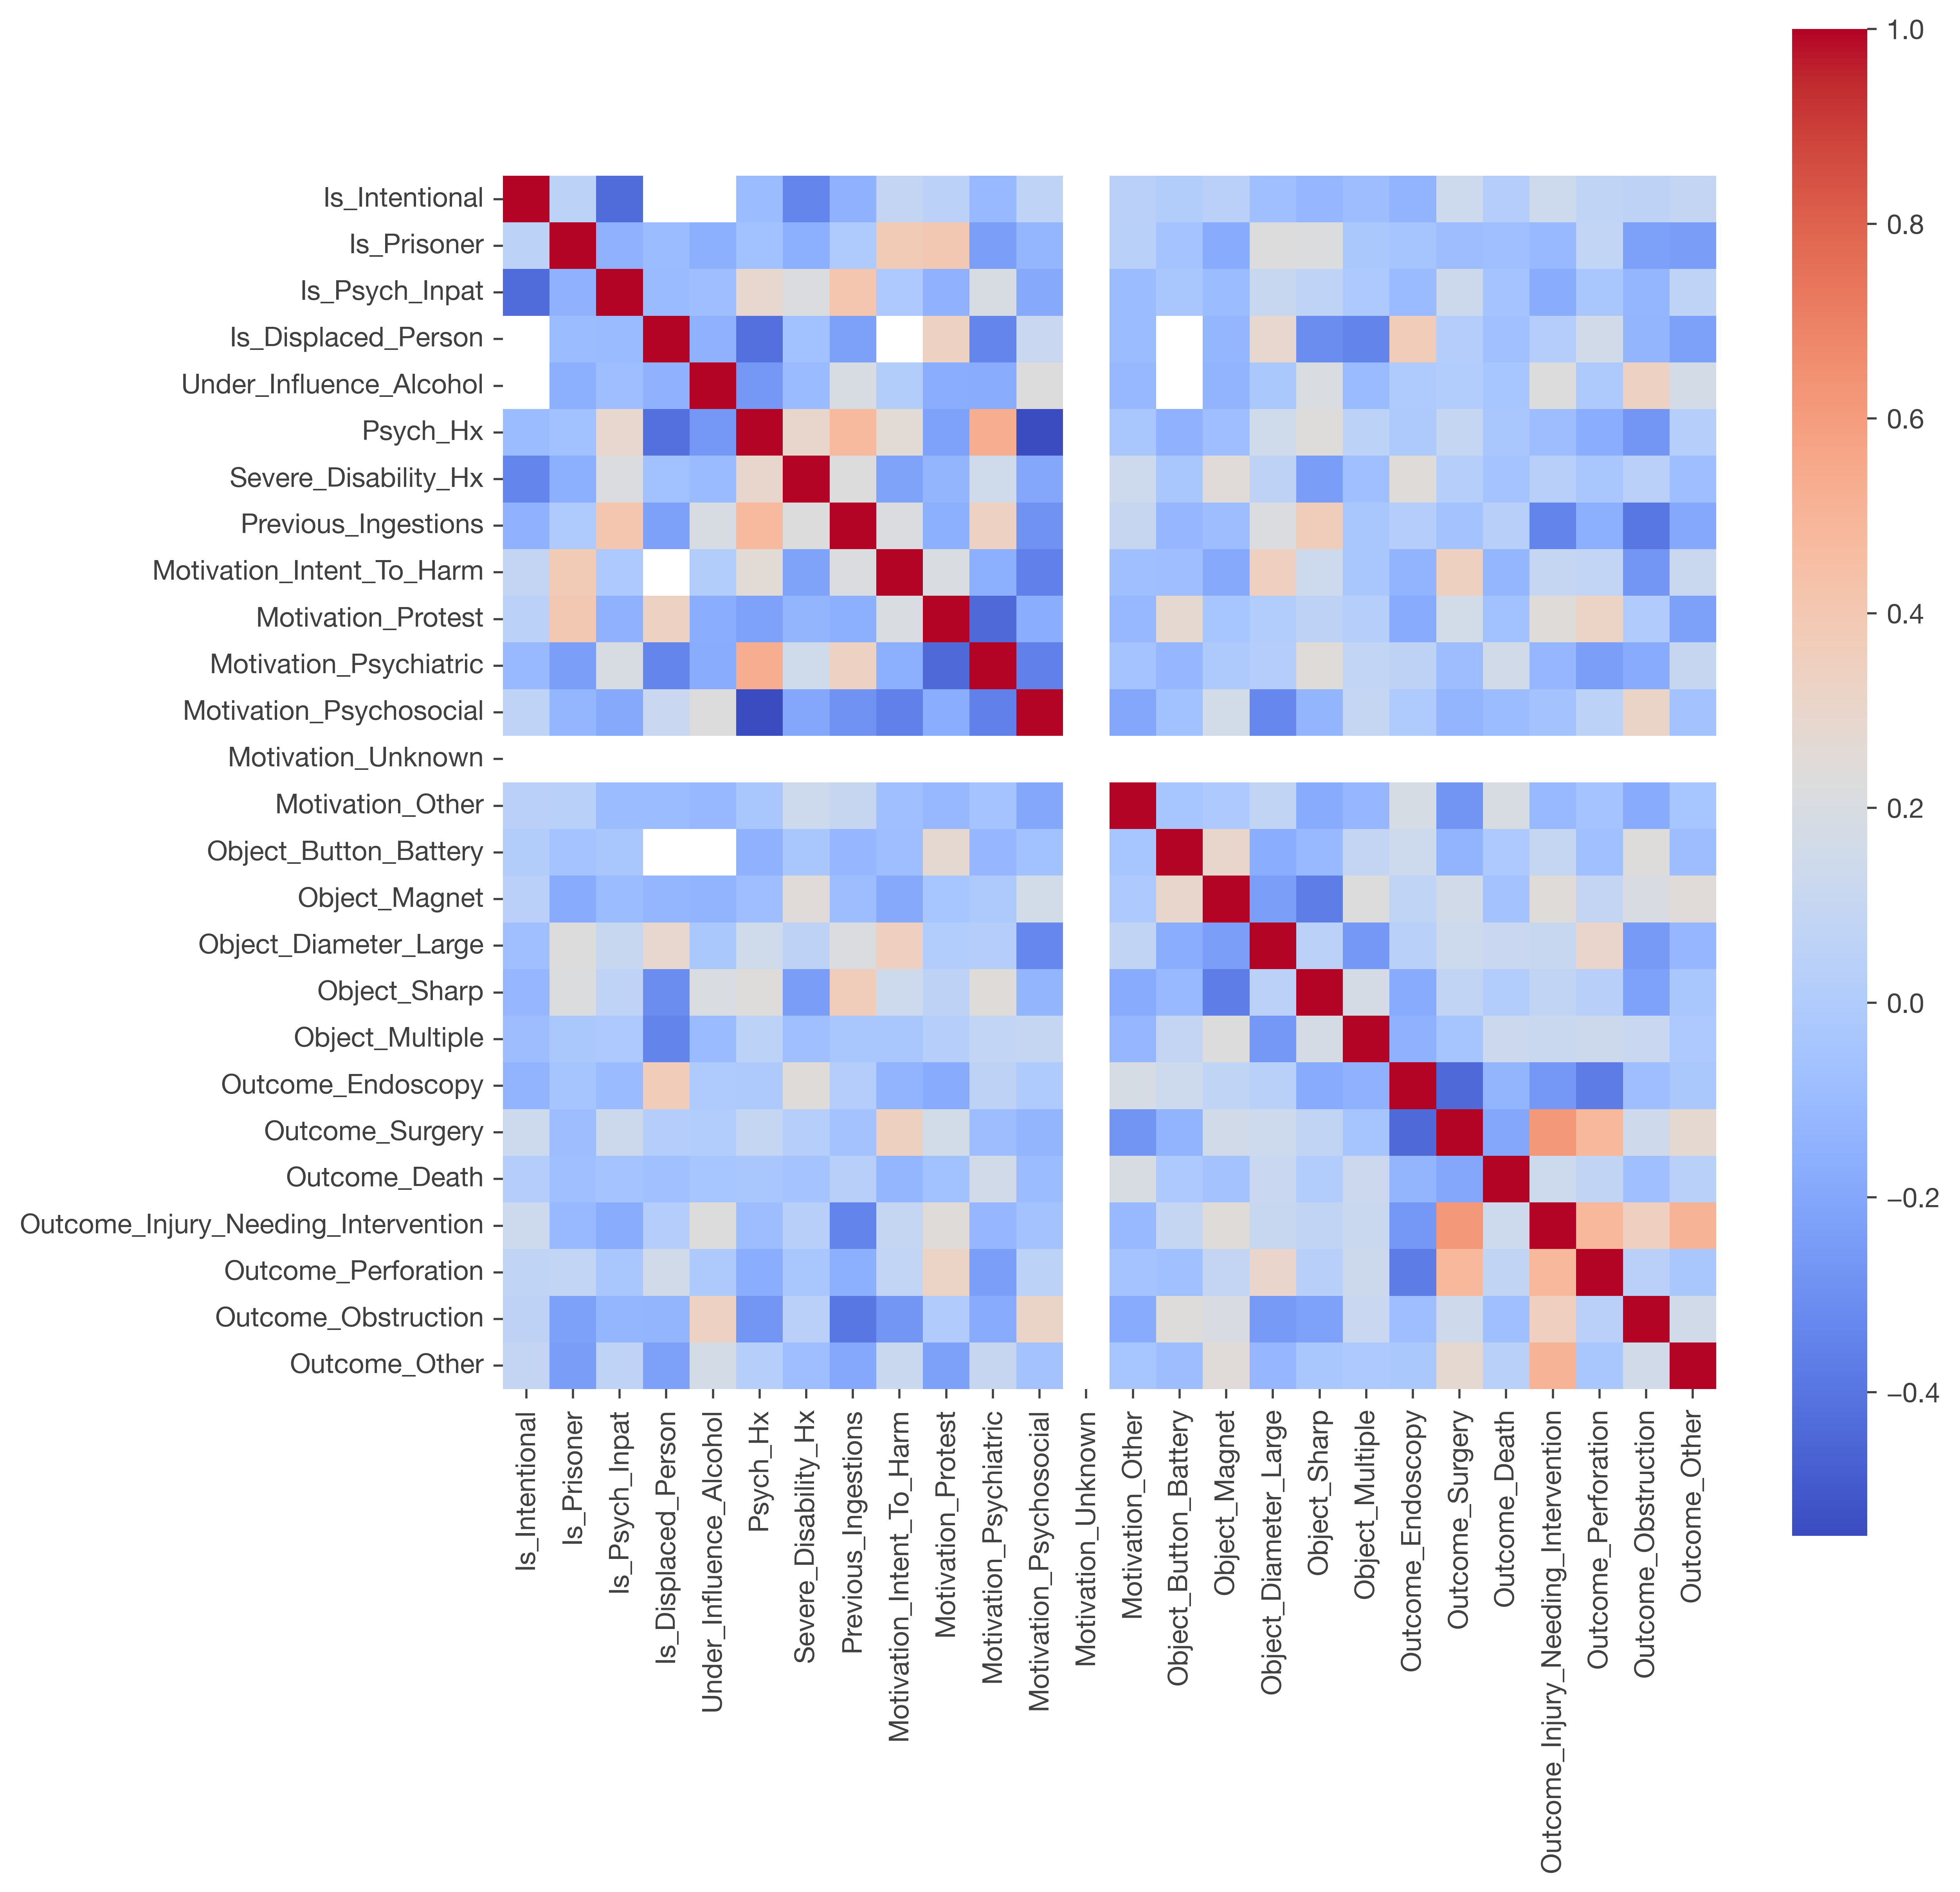

In [ ]:
corr = case_data.drop(['Study_ID', 'Age_Yrs'], axis=1).corr(numeric_only=True)

plt.figure(figsize=(10,10))
ax=sns.heatmap(corr, fmt=".2f", cmap="coolwarm", square=True, cbar=True)